Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


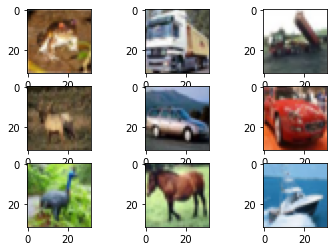

In [1]:

# example of loading the cifar10 dataset
#import tensorflow as tf
#from tf import keras
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

#Net A

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
782/782 [==============================] - 5s 5ms/step - loss: 1.9519 - accuracy: 0.3092 - val_loss: 1.8730 - val_accuracy: 0.3443
Epoch 2/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8321 - accuracy: 0.3601 - val_loss: 1.8429 - val_accuracy: 0.3565
Epoch 3/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8018 - accuracy: 0.3731 - val_loss: 1.8111 - val_accuracy: 0.3720
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 1.7841 - accuracy: 0.3799 - val_loss: 1.7731 - val_accuracy: 0.3851
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 1.7689 - accuracy: 0.3872 - val_loss: 1.7646 - val_accuracy: 0.3922
Epoch 6/50
782/782 [==============================] - 4s 5ms/step - loss: 1.7589 - accuracy: 0.3904 - val_loss: 1.7648 - val_accuracy: 0.3867
Epoch 7/50
782/782 [==============================] - 4s 5ms/step - loss: 1.7481 - accuracy: 0.3960 - val_loss: 1.7592 - val_accuracy: 0.3886
Epoch 

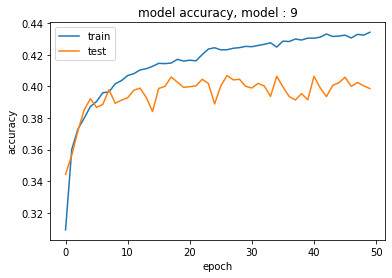

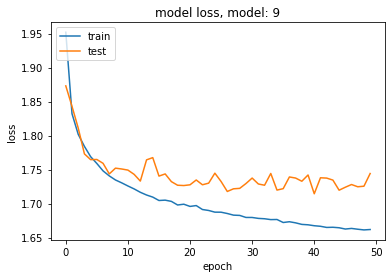

In [4]:

# netA
import sys
from matplotlib import pyplot as plt
#from matplotlib.pyplot import plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# define cnn model
def define_model():
  model = keras.Sequential([keras.layers.Flatten(),keras.layers.Dense(10,activation=tf.nn.softmax)])
  opt= SGD(lr=0.001,momentum=0.9)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
  #list(history.columns)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'model accuracy, model : {i+1}')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'model loss, model: {i+1}')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
 

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY) )
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

#Net B

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
782/782 [==============================] - 5s 5ms/step - loss: 1.9175 - accuracy: 0.3215 - val_loss: 1.7902 - val_accuracy: 0.3729
Epoch 2/50
782/782 [==============================] - 4s 5ms/step - loss: 1.7555 - accuracy: 0.3836 - val_loss: 1.7163 - val_accuracy: 0.3955
Epoch 3/50
782/782 [==============================] - 4s 5ms/step - loss: 1.6809 - accuracy: 0.4144 - val_loss: 1.6703 - val_accuracy: 0.4185
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 1.6291 - accuracy: 0.4328 - val_loss: 1.6025 - val_accuracy: 0.4484
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 1.5894 - accuracy: 0.4457 - val_loss: 1.5990 - val_accuracy: 0.4328
Epoch 6/50
782/782 [==============================] - 4s 5ms/step - loss: 1.5562 - accuracy: 0.4557 - val_loss: 1.5716 - val_accuracy: 0.4518
Epoch 7/50
782/782 [==============================] - 4s 5ms/step - loss: 1.5278 - accuracy: 0.4672 - val_loss: 1.5408 - val_accuracy: 0.4637
Epoch 

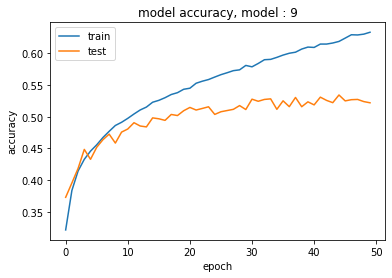

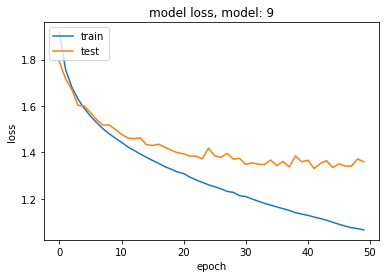

In [7]:
# Net B
import sys
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# define cnn model
def define_model():
  model = keras.Sequential([keras.layers.Flatten(),keras.layers.Dense(300,activation='relu'),keras.layers.Dense(10,activation=tf.nn.softmax)])
  opt= SGD(lr=0.001,momentum=0.9)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'model accuracy, model : {i+1}')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'model loss, model: {i+1}')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY))
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

#Net C

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
782/782 [==============================] - 11s 7ms/step - loss: 1.9826 - accuracy: 0.2926 - val_loss: 1.8132 - val_accuracy: 0.3686
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 1.7131 - accuracy: 0.4018 - val_loss: 1.6291 - val_accuracy: 0.4240
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 1.5936 - accuracy: 0.4382 - val_loss: 1.5451 - val_accuracy: 0.4558
Epoch 4/50
782/782 [==============================] - 5s 6ms/step - loss: 1.5332 - accuracy: 0.4579 - val_loss: 1.5028 - val_accuracy: 0.4654
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 1.4963 - accuracy: 0.4700 - val_loss: 1.4949 - val_accuracy: 0.4649
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 1.4687 - accuracy: 0.4822 - val_loss: 1.4422 - val_accuracy: 0.4917
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 1.4425 - accuracy: 0.4921 - val_loss: 1.4285 - val_accuracy: 0.4894
Epoch

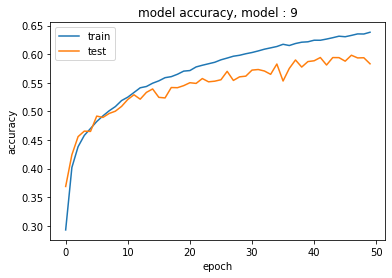

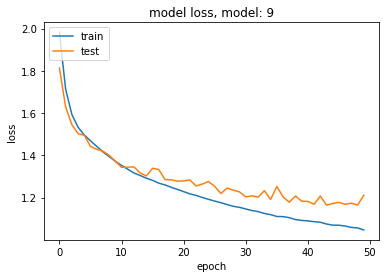

In [6]:
# Net C
import sys
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# define cnn model
def define_model():
  model = keras.Sequential([keras.layers.Conv2D(32,(5,25),activation='relu'),MaxPooling2D(pool_size=(2,2)),keras.layers.Flatten(),keras.layers.Dense(10,activation=tf.nn.softmax)])
  opt= SGD(lr=0.001,momentum=0.9)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'model accuracy, model : {i+1}')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'model loss, model: {i+1}')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY))
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()